In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 2938)

# Import and concatenate files

In [2]:
def load_original_data(a):
    df = pd.read_csv(a)
    return df

def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

def no_column_space(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

##def drop_columns(df) :
##    df.drop(columns=['##', '##', '##'], inplace=True)
##    return df

In [3]:
df=load_original_data('data/Life Expectancy Data.csv') 

df = lower_case_column_names(df)

df = no_column_space(df)

##df = drop_columns(df)##

In [14]:
df['infant_deaths']



0         62
1         64
2         66
3         69
4         71
5         74
6         77
7         80
8         82
9         84
10        85
11        87
12        87
13        88
14        88
15        88
16         0
17         0
18         0
19         0
20         0
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
30         1
31         1
32        21
33        21
34        21
35        21
36        21
37        21
38        20
39        20
40        20
41        20
42        19
43        19
44        20
45        20
46        20
47        21
48        66
49        67
50        69
51        72
52        75
53        78
54        81
55        84
56        87
57        90
58        92
59        94
60        95
61        96
62        97
63        97
64         0
65         0
66         0
67         0
68         0
69         0
70         0
71         0
72         0
73         0
74         0
75         0
76         0

In [9]:
df.loc[df['infant_deaths'] == 0]


country  year      status  \
16                                      Albania  2015  Developing   
17                                      Albania  2014  Developing   
18                                      Albania  2013  Developing   
19                                      Albania  2012  Developing   
20                                      Albania  2011  Developing   
64                          Antigua and Barbuda  2015  Developing   
65                          Antigua and Barbuda  2014  Developing   
66                          Antigua and Barbuda  2013  Developing   
67                          Antigua and Barbuda  2012  Developing   
68                          Antigua and Barbuda  2011  Developing   
69                          Antigua and Barbuda  2010  Developing   
70                          Antigua and Barbuda  2009  Developing   
71                          Antigua and Barbuda  2008  Developing   
72                          Antigua and Barbuda  2007  Developing   
73                          Antigua and Barbuda  2006  Developing   
74                          Antigua and Barbuda  2005  Developing   
75                          Antigua and Barbuda  2004  Developing   
76                          Antigua and Barbuda  2003  Developing   
77                          Antigua and Barbuda  2002  Developing   
78                          Antigua and Barbuda  2001  Developing   
79                          Antigua and Barbuda  2000  Developing   
128                                     Austria  2015   Developed   
129                                     Austria  2014   Developed   
130                                     Austria  2013   Developed   
131                                     Austria  2012   Developed   
132                                     Austria  2011   Developed   
133                                     Austria  2010   Developed   
134                                     Austria  2009   Developed   
135                                     Austria  2008   Developed   
136                                     Austria  2007   Developed   
137                                     Austria  2006   Developed   
138                                     Austria  2005   Developed   
139                                     Austria  2004   Developed   
140                                     Austria  2003   Developed   
141                                     Austria  2002   Developed   
142                                     Austria  2001   Developed   
143                                     Austria  2000   Developed   
160                                     Bahamas  2015  Developing   
161                                     Bahamas  2014  Developing   
162                                     Bahamas  2013  Developing   
163                                     Bahamas  2012  Developing   
164                                     Bahamas  2011  Developing   
165                                     Bahamas  2010  Developing   
166                                     Bahamas  2009  Developing   
167                                     Bahamas  2008  Developing   
168                                     Bahamas  2007  Developing   
169                                     Bahamas  2006  Developing   
170                                     Bahamas  2005  Developing   
171                                     Bahamas  2004  Developing   
172                                     Bahamas  2003  Developing   
173                                     Bahamas  2002  Developing   
174                                     Bahamas  2001  Developing   
175                                     Bahamas  2000  Developing   
176                                     Bahrain  2015  Developing   
177                                     Bahrain  2014  Developing   
178                                     Bahrain  2013  Developing   
179                                     Bahrain  2012  Developing   
180                                   

In [4]:
df.columns = (['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population',
       '_thinness_1_19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'])

In [6]:
df.iloc[df['gdp'].idxmin()] 

country                            Philippines
year                                      2002
status                              Developing
life_expectancy                           66.8
adult_mortality                          221.0
infant_deaths                               68
alcohol                                   4.42
percentage_expenditure                0.099872
hepatitis_b                               42.0
measles                                   7003
bmi                                       18.7
under_five_deaths                           89
polio                                     77.0
total_expenditure                         2.79
diphtheria                                79.0
hiv_aids                                   0.1
gdp                                    1.68135
population                            813526.0
_thinness_1_19_years                       1.0
thinness_5-9_years                         9.7
income_composition_of_resources          0.625
schooling    

In [21]:
df.percentage_expenditure.describe()

count     2928.000000
mean       740.321185
std       1990.930605
min          0.000000
25%          4.853964
50%         65.611455
75%        442.614322
max      19479.911610
Name: percentage_expenditure, dtype: float64

<AxesSubplot:>

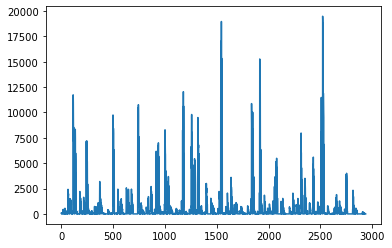

In [23]:
df.percentage_expenditure.plot()

In [37]:
df.loc[df['infant_deaths'] == 0]


Empty DataFrame
Columns: [country, year, status, life_expectancy, adult_mortality, infant_deaths, alcohol, percentage_expenditure, hepatitis_b, measles, bmi, polio, total_expenditure, diphtheria, hiv_aids, population, _thinness_1_19_years, income_composition_of_resources]
Index: []

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)] 

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

# Add/drop columns and rows

In [5]:
## Add GDP per capita

##df['gdp_capita'] = df['gdp'] / df['population']




In [12]:
## Drop 0 value

df = df.replace(0, np.NaN)
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 2932
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          911 non-null    object 
 1   year                             911 non-null    int64  
 2   status                           911 non-null    object 
 3   life_expectancy                  911 non-null    float64
 4   adult_mortality                  911 non-null    float64
 5   infant_deaths                    911 non-null    float64
 6   alcohol                          911 non-null    float64
 7   percentage_expenditure           911 non-null    float64
 8   hepatitis_b                      911 non-null    float64
 9   measles                          911 non-null    float64
 10  bmi                              911 non-null    float64
 11  under_five_deaths                911 non-null    float64
 12  polio                

In [14]:
## Missed countries
def clean_missedcountry(a):
    missed_country = a[a.groupby('country')['country'].transform('size') < 10]
    missed_list = missed_country.index.tolist()
    a.drop(missed_list, inplace = True)
    return a

In [15]:
clean_missedcountry(df)

country  year      status  life_expectancy  adult_mortality  \
0            Afghanistan  2015  Developing             65.0            263.0   
1            Afghanistan  2014  Developing             59.9            271.0   
2            Afghanistan  2013  Developing             59.9            268.0   
3            Afghanistan  2012  Developing             59.5            272.0   
4            Afghanistan  2011  Developing             59.2            275.0   
5            Afghanistan  2010  Developing             58.8            279.0   
6            Afghanistan  2009  Developing             58.6            281.0   
7            Afghanistan  2008  Developing             58.1            287.0   
8            Afghanistan  2007  Developing             57.5            295.0   
9            Afghanistan  2006  Developing             57.3            295.0   
10           Afghanistan  2005  Developing             57.3            291.0   
11           Afghanistan  2004  Developing             57.0            293.0   
12           Afghanistan  2003  Developing             56.7            295.0   
13           Afghanistan  2002  Developing             56.2              3.0   
14           Afghanistan  2001  Developing             55.3            316.0   
15           Afghanistan  2000  Developing             54.8            321.0   
97               Armenia  2014  Developing             74.6             12.0   
98               Armenia  2013  Developing             74.4            123.0   
101              Armenia  2010  Developing             73.5            132.0   
104              Armenia  2007  Developing             73.5            132.0   
105              Armenia  2006  Developing             72.9            141.0   
106              Armenia  2005  Developing             73.0            137.0   
107              Armenia  2004  Developing             73.0            132.0   
108              Armenia  2003  Developing             72.7            134.0   
109              Armenia  2002  Developing             72.6            134.0   
110              Armenia  2001  Developing             72.6            141.0   
111              Armenia  2000  Developing             72.0            142.0   
113            Australia  2014   Developed             82.7              6.0   
114            Australia  2013   Developed             82.5             61.0   
115            Australia  2012   Developed             82.3             61.0   
116            Australia  2011   Developed             82.0             63.0   
117            Australia  2010   Developed             81.9             64.0   
118            Australia  2009   Developed             81.7             66.0   
119            Australia  2008   Developed             81.3             66.0   
120            Australia  2007   Developed             81.3             66.0   
122            Australia  2005   Developed             81.0             67.0   
123            Australia  2004   Developed             86.0             69.0   
124            Australia  2003   Developed             83.0             71.0   
125            Australia  2002   Developed             79.9             73.0   
126            Australia  2001   Developed             79.9             75.0   
193           Bangladesh  2014  Developing             71.4            132.0   
194           Bangladesh  2013  Developing             71.0            135.0   
195           Bangladesh  2012  Developing             77.0            137.0   
196           Bangladesh  2011  Developing             73.0             14.0   
197           Bangladesh  2010  Developing             69.9            142.0   
198           Bangladesh  2009  Developing             69.5            144.0   
199           Bangladesh  2008  Developing             69.1            147.0   
200           Bangladesh  2007  Developing             68.6            151.0   
201           Bangladesh  2006  Developing             68.2            152.0   
202           Ban

In [18]:
def remove_outliers(df):
    df_n = df._get_numeric_data()
    df_c = df.select_dtypes(include=['object'])
    Q1 = df_n.quantile(0.25)
    Q3 = df_n.quantile(0.75)
    IQR = Q3 - Q1
    df_n = df_n[~((df_n < (Q1 - 1.5 * IQR)) |(df_n > (Q3 + 1.5 * IQR))).any(axis=1)]
    df = df_n.merge(df_c,how='left',left_index=True,right_index=True)
    return df
remove_outliers(df)

year  life_expectancy  adult_mortality  infant_deaths  alcohol  \
97    2014             74.6             12.0            1.0     3.91   
98    2013             74.4            123.0            1.0     3.79   
101   2010             73.5            132.0            1.0     4.23   
105   2006             72.9            141.0            1.0     4.01   
107   2004             73.0            132.0            1.0     3.81   
108   2003             72.7            134.0            1.0     3.03   
109   2002             72.6            134.0            1.0     2.86   
110   2001             72.6            141.0            1.0     2.86   
111   2000             72.0            142.0            1.0     2.90   
120   2007             81.3             66.0            1.0    10.56   
125   2002             79.9             73.0            1.0     9.84   
273   2014             59.7            252.0           25.0     0.01   
274   2013             59.5            251.0           25.0     0.01   
276   2011             59.1            251.0           25.0     1.40   
277   2010             58.7            254.0           25.0     1.33   
279   2008             57.6            278.0           25.0     1.28   
280   2007             57.1            283.0           25.0     1.12   
281   2006             56.8            284.0           25.0     1.19   
283   2004             56.1            285.0           25.0     1.15   
284   2003             55.8            285.0           25.0     1.35   
337   2014             65.1            268.0            2.0     0.01   
338   2013             64.2            286.0            2.0     0.01   
353   2014             74.8            144.0           44.0     7.32   
361   2006             73.0            161.0           70.0     7.10   
365   2002             71.4            176.0           95.0     7.00   
366   2001             71.0            179.0          103.0     7.13   
386   2013             74.1             14.0            1.0    12.06   
387   2012             73.9            139.0            1.0    10.99   
388   2011             73.7            144.0            1.0    10.67   
390   2009             73.2            152.0            1.0    10.93   
391   2008             72.9            155.0            1.0    10.98   
392   2007             72.6            157.0            1.0    10.89   
393   2006             72.2            161.0            1.0    10.39   
394   2005             72.1             16.0            1.0    10.48   
398   2001             71.6             16.0            1.0    10.72   
399   2000             71.1            163.0            1.0     9.69   
497   2014             82.0             65.0            2.0     8.10   
502   2009             81.0             72.0            2.0     8.40   
935   2010             81.3             86.0            3.0    11.70   
938   2007             89.0             89.0            3.0    12.20   
979   2014             74.5            125.0            1.0     6.13   
981   2012             74.2             13.0            1.0     7.71   
982   2011             73.9            127.0            1.0     8.14   
983   2010             73.8            132.0            1.0     7.24   
984   2009             73.2            133.0            1.0     6.66   
986   2007             74.4             12.0            1.0     8.65   
987   2006             73.9            126.0            1.0     6.18   
988   2005             73.9            128.0            1.0     4.70   
990   2003             72.7            132.0            1.0     3.36   
991   2002             71.7            142.0            2.0     2.72   
992   2001             73.0            121.0            2.0     2.76   
995   2014             89.0             69.0            2.0    11.03   
996   2013             86.0             71.0            2.0    10.94   
997   2012             86.0             71.0            2.0    11.18   
998   2011             85.0             74.0  

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 2916
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          634 non-null    object 
 1   year                             634 non-null    int64  
 2   status                           634 non-null    object 
 3   life_expectancy                  634 non-null    float64
 4   adult_mortality                  634 non-null    float64
 5   infant_deaths                    634 non-null    float64
 6   alcohol                          634 non-null    float64
 7   percentage_expenditure           634 non-null    float64
 8   hepatitis_b                      634 non-null    float64
 9   measles                          634 non-null    float64
 10  bmi                              634 non-null    float64
 11  under_five_deaths                634 non-null    float64
 12  polio                

In [20]:
##drop duplicated rows
df.drop_duplicates()

country  year      status  life_expectancy  adult_mortality  \
0            Afghanistan  2015  Developing             65.0            263.0   
1            Afghanistan  2014  Developing             59.9            271.0   
2            Afghanistan  2013  Developing             59.9            268.0   
3            Afghanistan  2012  Developing             59.5            272.0   
4            Afghanistan  2011  Developing             59.2            275.0   
5            Afghanistan  2010  Developing             58.8            279.0   
6            Afghanistan  2009  Developing             58.6            281.0   
7            Afghanistan  2008  Developing             58.1            287.0   
8            Afghanistan  2007  Developing             57.5            295.0   
9            Afghanistan  2006  Developing             57.3            295.0   
10           Afghanistan  2005  Developing             57.3            291.0   
11           Afghanistan  2004  Developing             57.0            293.0   
12           Afghanistan  2003  Developing             56.7            295.0   
13           Afghanistan  2002  Developing             56.2              3.0   
14           Afghanistan  2001  Developing             55.3            316.0   
15           Afghanistan  2000  Developing             54.8            321.0   
97               Armenia  2014  Developing             74.6             12.0   
98               Armenia  2013  Developing             74.4            123.0   
101              Armenia  2010  Developing             73.5            132.0   
104              Armenia  2007  Developing             73.5            132.0   
105              Armenia  2006  Developing             72.9            141.0   
106              Armenia  2005  Developing             73.0            137.0   
107              Armenia  2004  Developing             73.0            132.0   
108              Armenia  2003  Developing             72.7            134.0   
109              Armenia  2002  Developing             72.6            134.0   
110              Armenia  2001  Developing             72.6            141.0   
111              Armenia  2000  Developing             72.0            142.0   
113            Australia  2014   Developed             82.7              6.0   
114            Australia  2013   Developed             82.5             61.0   
115            Australia  2012   Developed             82.3             61.0   
116            Australia  2011   Developed             82.0             63.0   
117            Australia  2010   Developed             81.9             64.0   
118            Australia  2009   Developed             81.7             66.0   
119            Australia  2008   Developed             81.3             66.0   
120            Australia  2007   Developed             81.3             66.0   
122            Australia  2005   Developed             81.0             67.0   
123            Australia  2004   Developed             86.0             69.0   
124            Australia  2003   Developed             83.0             71.0   
125            Australia  2002   Developed             79.9             73.0   
126            Australia  2001   Developed             79.9             75.0   
193           Bangladesh  2014  Developing             71.4            132.0   
194           Bangladesh  2013  Developing             71.0            135.0   
195           Bangladesh  2012  Developing             77.0            137.0   
196           Bangladesh  2011  Developing             73.0             14.0   
197           Bangladesh  2010  Developing             69.9            142.0   
198           Bangladesh  2009  Developing             69.5            144.0   
199           Bangladesh  2008  Developing             69.1            147.0   
200           Bangladesh  2007  Developing             68.6            151.0   
201           Bangladesh  2006  Developing             68.2            152.0   
202           Ban

In [21]:
df

country  year      status  life_expectancy  adult_mortality  \
0            Afghanistan  2015  Developing             65.0            263.0   
1            Afghanistan  2014  Developing             59.9            271.0   
2            Afghanistan  2013  Developing             59.9            268.0   
3            Afghanistan  2012  Developing             59.5            272.0   
4            Afghanistan  2011  Developing             59.2            275.0   
5            Afghanistan  2010  Developing             58.8            279.0   
6            Afghanistan  2009  Developing             58.6            281.0   
7            Afghanistan  2008  Developing             58.1            287.0   
8            Afghanistan  2007  Developing             57.5            295.0   
9            Afghanistan  2006  Developing             57.3            295.0   
10           Afghanistan  2005  Developing             57.3            291.0   
11           Afghanistan  2004  Developing             57.0            293.0   
12           Afghanistan  2003  Developing             56.7            295.0   
13           Afghanistan  2002  Developing             56.2              3.0   
14           Afghanistan  2001  Developing             55.3            316.0   
15           Afghanistan  2000  Developing             54.8            321.0   
97               Armenia  2014  Developing             74.6             12.0   
98               Armenia  2013  Developing             74.4            123.0   
101              Armenia  2010  Developing             73.5            132.0   
104              Armenia  2007  Developing             73.5            132.0   
105              Armenia  2006  Developing             72.9            141.0   
106              Armenia  2005  Developing             73.0            137.0   
107              Armenia  2004  Developing             73.0            132.0   
108              Armenia  2003  Developing             72.7            134.0   
109              Armenia  2002  Developing             72.6            134.0   
110              Armenia  2001  Developing             72.6            141.0   
111              Armenia  2000  Developing             72.0            142.0   
113            Australia  2014   Developed             82.7              6.0   
114            Australia  2013   Developed             82.5             61.0   
115            Australia  2012   Developed             82.3             61.0   
116            Australia  2011   Developed             82.0             63.0   
117            Australia  2010   Developed             81.9             64.0   
118            Australia  2009   Developed             81.7             66.0   
119            Australia  2008   Developed             81.3             66.0   
120            Australia  2007   Developed             81.3             66.0   
122            Australia  2005   Developed             81.0             67.0   
123            Australia  2004   Developed             86.0             69.0   
124            Australia  2003   Developed             83.0             71.0   
125            Australia  2002   Developed             79.9             73.0   
126            Australia  2001   Developed             79.9             75.0   
193           Bangladesh  2014  Developing             71.4            132.0   
194           Bangladesh  2013  Developing             71.0            135.0   
195           Bangladesh  2012  Developing             77.0            137.0   
196           Bangladesh  2011  Developing             73.0             14.0   
197           Bangladesh  2010  Developing             69.9            142.0   
198           Bangladesh  2009  Developing             69.5            144.0   
199           Bangladesh  2008  Developing             69.1            147.0   
200           Bangladesh  2007  Developing             68.6            151.0   
201           Bangladesh  2006  Developing             68.2            152.0   
202           Ban

# Plotting for first impression

In [22]:
corr_matrix = df.corr()

In [23]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)] 

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [24]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'polio', 'total_expenditure', 'diphtheria',
       'hiv_aids', 'population', '_thinness_1_19_years'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 2916
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 634 non-null    object 
 1   year                    634 non-null    int64  
 2   status                  634 non-null    object 
 3   life_expectancy         634 non-null    float64
 4   adult_mortality         634 non-null    float64
 5   infant_deaths           634 non-null    float64
 6   alcohol                 634 non-null    float64
 7   percentage_expenditure  634 non-null    float64
 8   hepatitis_b             634 non-null    float64
 9   measles                 634 non-null    float64
 10  bmi                     634 non-null    float64
 11  polio                   634 non-null    float64
 12  total_expenditure       634 non-null    float64
 13  diphtheria              634 non-null    float64
 14  hiv_aids                634 non-null    f

In [27]:
df.style.background_gradient(cmap='Blues')


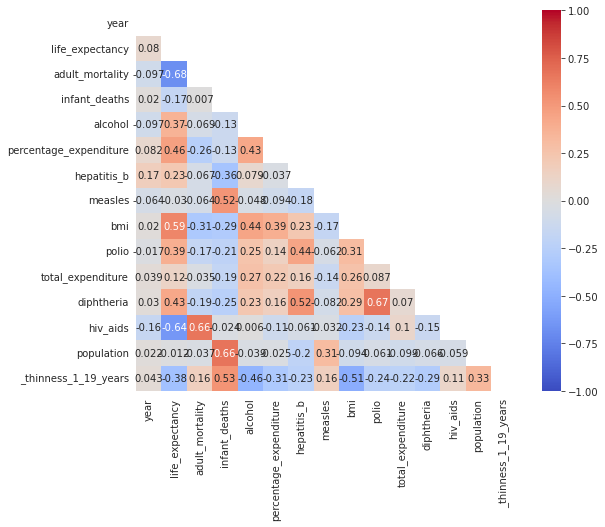

In [28]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Clean the NaN 


In [29]:
df.columns[df.isna().any()].tolist()

[]

## Clean the life_expectancy


In [30]:
##df.fillna(df.mean(), inplace=True)
##Testing for replacing all rows with NaN.

In [31]:
df_alcohol_clean = df[df['alcohol'].isnull()]
alcohol_list = df_alcohol_clean.index.tolist()
for a in alcohol_list:
    b = df.iloc[a]




## Should not drop life_expectancy because it is a independant variable. 
## And the number of NaN values at this columns is not significant.

## Clean adult_mortality. 
The adult mortality rate shown in the World Development Indicators (WDI) database and related products refers to 
the probability that those who have reached age 15 will die before reaching age 60 (shown per 1,000 persons). 
In other words, a value of 150 means that out of 1,000 persons who have reached age 15, 150 are expected to 
die before reaching age 60, and 850 are expected to survive to age 60. This is based on a “synthetic cohort”: 
current life-table mortality rates are applied to the current cohort of 15 year olds, assuming no changes in mortality.

In [32]:
df[df['adult_mortality'].isnull()]
## Same case as life expectancy.

Empty DataFrame
Columns: [country, year, status, life_expectancy, adult_mortality, infant_deaths, alcohol, percentage_expenditure, hepatitis_b, measles, bmi, polio, total_expenditure, diphtheria, hiv_aids, population, _thinness_1_19_years]
Index: []

## Clean alcohol

In [33]:
df[df['alcohol'].isnull()]

Empty DataFrame
Columns: [country, year, status, life_expectancy, adult_mortality, infant_deaths, alcohol, percentage_expenditure, hepatitis_b, measles, bmi, polio, total_expenditure, diphtheria, hiv_aids, population, _thinness_1_19_years]
Index: []

# Get the numeric and categoric

In [34]:
numericals_features =df._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

year  life_expectancy  adult_mortality  infant_deaths  alcohol  \
0  2015             65.0            263.0           62.0     0.01   
1  2014             59.9            271.0           64.0     0.01   
2  2013             59.9            268.0           66.0     0.01   
3  2012             59.5            272.0           69.0     0.01   
4  2011             59.2            275.0           71.0     0.01   

   percentage_expenditure  hepatitis_b  measles   bmi  polio  \
0               71.279624         65.0   1154.0  19.1    6.0   
1               73.523582         62.0    492.0  18.6   58.0   
2               73.219243         64.0    430.0  18.1   62.0   
3               78.184215         67.0   2787.0  17.6   67.0   
4                7.097109         68.0   3013.0  17.2   68.0   

   total_expenditure  diphtheria  hiv_aids  population  _thinness_1_19_years  
0               8.16        65.0       0.1  33736494.0                  17.2  
1               8.18        62.0       0.1    327582.0                  17.5  
2               8.13        64.0       0.1  31731688.0                  17.7  
3               8.52        67.0       0.1   3696958.0                  17.9  
4               7.87        68.0       0.1   2978599.0                  18.2

In [35]:
numericals_features_scaled=StandardScaler().fit_transform(numericals_features)
numericals_features_scaled = pd.DataFrame(numericals_features_scaled, index= numericals_features.index, columns= numericals_features.columns)


In [36]:
## Get Categorical data

categoricals_features = df.select_dtypes(object)

# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [37]:
numericals_features_scaled

year  life_expectancy  adult_mortality  infant_deaths   alcohol  \
0     1.824748        -0.339855         0.633124      -0.052432 -1.061057   
1     1.578128        -0.888640         0.692747      -0.041726 -1.061057   
2     1.331509        -0.888640         0.670388      -0.031020 -1.061057   
3     1.084890        -0.931682         0.700199      -0.014961 -1.061057   
4     0.838271        -0.963964         0.722558      -0.004255 -1.061057   
5     0.591652        -1.007005         0.752369       0.011804 -1.061057   
6     0.345033        -1.028526         0.767275       0.027863 -1.061057   
7     0.098414        -1.082329         0.811992       0.043921 -1.056142   
8    -0.148205        -1.146892         0.871614       0.054627 -1.058599   
9    -0.394824        -1.168413         0.871614       0.065333 -1.056142   
10   -0.641443        -1.168413         0.841803       0.070686 -1.058599   
11   -0.888062        -1.200694         0.856708       0.081392 -1.058599   
12   -1.134681        -1.232976         0.871614       0.081392 -1.061057   
13   -1.381300        -1.286778        -1.304606       0.086745 -1.061057   
14   -1.627919        -1.383623         1.028123       0.086745 -1.061057   
15   -1.874538        -1.437425         1.065387       0.086745 -1.061057   
97    1.578128         0.693152        -1.237530      -0.378964 -0.102609   
98    1.331509         0.671631        -0.410269      -0.378964 -0.132100   
101   0.591652         0.574787        -0.343194      -0.378964 -0.023967   
104  -0.148205         0.574787        -0.343194      -0.378964 -0.082948   
105  -0.394824         0.510224        -0.276118      -0.378964 -0.078033   
106  -0.641443         0.520984        -0.305930      -0.378964 -0.019052   
107  -0.888062         0.520984        -0.343194      -0.378964 -0.127184   
108  -1.134681         0.488703        -0.328288      -0.378964 -0.318874   
109  -1.381300         0.477942        -0.328288      -0.378964 -0.360653   
110  -1.627919         0.477942        -0.276118      -0.378964 -0.360653   
111  -1.874538         0.413379        -0.268665      -0.378964 -0.350822   
113   1.578128         1.564752        -1.282247      -0.378964  1.322775   
114   1.331509         1.543231        -0.872343      -0.378964  1.362096   
115   1.084890         1.521710        -0.872343      -0.378964  1.401417   
116   0.838271         1.489429        -0.857437      -0.378964  1.467771   
117   0.591652         1.478668        -0.849984      -0.378964  1.521838   
118   0.345033         1.457147        -0.835079      -0.378964  1.546413   
119   0.098414         1.414105        -0.835079      -0.378964  1.580819   
120  -0.148205         1.414105        -0.835079      -0.378964  1.531668   
122  -0.641443         1.381824        -0.827626      -0.378964  1.467771   
123  -0.888062         1.919848        -0.812720      -0.378964  1.354724   
124  -1.134681         1.597033        -0.797815      -0.378964  1.386672   
125  -1.381300         1.263458        -0.782909      -0.378964  1.354724   
126  -1.627919         1.263458        -0.768004      -0.378964  1.278539   
193   1.578128         0.348816        -0.343194       0.140275 -1.061057   
194   1.331509         0.305774        -0.320835       0.172393 -1.061057   
195   1.084890         0.951404        -0.305930       0.209864 -1.061057   
196   0.838271         0.520984        -1.222625       0.247335 -1.061057   
197   0.591652         0.187409        -0.268665       0.290158 -1.061057   
198   0.345033         0.144367        -0.253760       0.338335 -1.061057   
199   0.098414         0.101325        -0.231401       0.386512 -1.061057   
200  -0.148205         0.047523        -0.201590       0.440042 -1.061057   
201  -0.394824         0.004481        -0.194137       0.493572 -1.061057   
202  -0.641443        -0.038561        -0.171779       0.547101 -1.061057   
203  -0.888062        -0.092364        -0.149421       0.605984 -1.061057   
204  -

In [38]:
categoricals_features

country_Armenia  country_Australia  country_Bangladesh  country_Benin  \
0                   0                  0                   0              0   
1                   0                  0                   0              0   
2                   0                  0                   0              0   
3                   0                  0                   0              0   
4                   0                  0                   0              0   
5                   0                  0                   0              0   
6                   0                  0                   0              0   
7                   0                  0                   0              0   
8                   0                  0                   0              0   
9                   0                  0                   0              0   
10                  0                  0                   0              0   
11                  0                  0                   0              0   
12                  0                  0                   0              0   
13                  0                  0                   0              0   
14                  0                  0                   0              0   
15                  0                  0                   0              0   
97                  1                  0                   0              0   
98                  1                  0                   0              0   
101                 1                  0                   0              0   
104                 1                  0                   0              0   
105                 1                  0                   0              0   
106                 1                  0                   0              0   
107                 1                  0                   0              0   
108                 1                  0                   0              0   
109                 1                  0                   0              0   
110                 1                  0                   0              0   
111                 1                  0                   0              0   
113                 0                  1                   0              0   
114                 0                  1                   0              0   
115                 0                  1                   0              0   
116                 0                  1                   0              0   
117                 0                  1                   0              0   
118                 0                  1                   0              0   
119                 0                  1                   0              0   
120                 0                  1                   0              0   
122                 0                  1                   0              0   
123                 0                  1                   0              0   
124                 0                  1                   0              0   
125                 0                  1                   0              0   
126                 0                  1                   0              0   
193                 0                  0                   1              0   
194                 0                  0                   1              0   
195                 0                  0                   1              0   
196                 0                  0                   1              0   
197                 0                  0                   1              0   
198                 0                  0                   1              0   
199                 0                  0                   1              0   
200                 0                  0                   1              0   
201                 0                  0                   1              0   
202                 0                  0                

In [39]:
all_features=pd.concat([numericals_features_scaled, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features = all_features.reset_index()
type(all_features)

pandas.core.frame.DataFrame

In [80]:
x=numericals_features_scaled.drop(['life_expectancy', 'adult_mortality', 'percentage_expenditure', 
                                   'year',  'infant_deaths' ,'hepatitis_b', 'measles',  'population', '_thinness_1_19_years'], axis=1)
y=numericals_features_scaled.life_expectancy

In [81]:
x

alcohol       bmi     polio  total_expenditure  diphtheria  hiv_aids
0    -1.061057 -0.791302 -3.361934           1.073513   -0.926417 -0.406112
1    -1.061057 -0.816514 -1.093350           1.082109   -1.071262 -0.406112
2    -1.061057 -0.841727 -0.918843           1.060618   -0.974699 -0.406112
3    -1.061057 -0.866940 -0.700710           1.228246   -0.829853 -0.406112
4    -1.061057 -0.887110 -0.657083           0.948867   -0.781571 -0.406112
5    -1.061057 -0.912322 -0.744336           1.520520   -0.878135 -0.406112
6    -1.061057 -0.937535 -0.875216           1.615079   -1.022980 -0.406112
7    -1.056142 -0.962747 -0.831590           1.146581   -0.974699 -0.406112
8    -1.058599 -0.987960 -0.875216           0.458878   -1.022980 -0.406112
9    -1.056142 -1.013173 -1.093350           0.759748   -1.264390 -0.406112
10   -1.058599 -1.038385 -1.093350           1.305613   -1.264390 -0.406112
11   -1.058599 -1.058555 -3.405561           1.344296   -3.823326 -0.406112
12   -1.061057 -1.078725 -1.835002           1.357191   -2.085180 -0.406112
13   -1.061057 -1.098895 -2.053135           0.901587   -2.326590 -0.406112
14   -1.061057 -1.119065 -2.096762           0.918780   -2.471435 -0.406112
15   -1.061057 -1.139236 -2.576655           1.090705   -2.905971 -0.406112
97   -0.102609  0.973580  0.520836          -0.508205    0.425474 -0.406112
98   -0.132100  0.933240  0.564463          -0.478118    0.522038 -0.406112
101  -0.023967  0.827347  0.564463          -0.473820    0.473756 -0.406112
104  -0.082948  0.751709 -3.231055          -0.581273    0.184065 -0.406112
105  -0.078033  0.726497  0.171823          -0.465223    0.135783 -0.406112
106  -0.019052  0.706327  0.389956          -0.177248   -3.630199 -0.406112
107  -0.127184  0.686156  0.433583          -0.069794    0.328910 -0.406112
108  -0.318874  0.671029  0.564463          -0.044005    0.473756 -0.406112
109  -0.360653  0.655901  0.564463          -0.112775    0.473756 -0.406112
110  -0.360653  0.635731  0.608089           0.119324    0.473756 -0.406112
111  -0.350822  0.620604  0.564463           0.252567    0.425474 -0.406112
113   1.322775  1.578682  0.389956           1.615079    0.377192 -0.406112
114   1.362096  1.548427  0.346329           1.589290    0.328910 -0.406112
115   1.401417  1.523215  0.389956           1.589290    0.377192 -0.406112
116   1.467771  1.492960  0.389956           1.520520    0.377192 -0.406112
117   1.521838  1.467747  0.389956           1.520520    0.377192 -0.406112
118   1.546413  1.442534  0.389956           1.649464    0.377192 -0.406112
119   1.580819  1.417322  0.389956           1.339998    0.377192 -0.406112
120   1.531668  1.397152  0.389956           1.232544    0.377192 -0.406112
122   1.467771  1.346726  0.389956           1.198159    0.377192 -0.406112
123   1.354724 -1.406489  0.389956           1.249737    0.377192 -0.406112
124   1.386672 -1.436744  0.389956           1.142283    0.425474 -0.406112
125   1.354724  1.250919  0.389956           1.172370    0.377192 -0.406112
126   1.278539  1.220664  0.346329           1.082109    0.377192 -0.406112
193  -1.061057 -0.861897  0.608089          -1.221697    0.618601 -0.406112
194  -1.061057 -0.897195  0.564463          -1.195908    0.570319 -0.406112
195  -1.061057 -0.927450  0.477209          -0.800479    0.473756 -0.406112
196  -1.061057 -0.957705  0.564463          -1.075560    0.570319 -0.406112
197  -1.061057 -0.987960  0.477209          -0.886442    0.473756 -0.406112
198  -1.061057 -1.018215  0.608089          -1.183014    0.618601 -0.406112
199  -1.061057 -1.048470  0.564463          -1.208803    0.570319 -0.406112
200  -1.061057 -1.073683  0.564463          -1.230294    0.473756 -0.406112
201  -1.061057 -1.098895  0.520836          -1.230294    0.473756 -0.406112
202  -1.061057 -1.124108  0.477209          -1.281871    0.425474 -0.406112
203  -1.061057 -1.149321  0.215450          -1.307660    0.715165 -0.406112
204  -1.061057 -1.169491 -3.231055          -1.354940  

In [82]:
y

0      -0.339855
1      -0.888640
2      -0.888640
3      -0.931682
4      -0.963964
5      -1.007005
6      -1.028526
7      -1.082329
8      -1.146892
9      -1.168413
10     -1.168413
11     -1.200694
12     -1.232976
13     -1.286778
14     -1.383623
15     -1.437425
97      0.693152
98      0.671631
101     0.574787
104     0.574787
105     0.510224
106     0.520984
107     0.520984
108     0.488703
109     0.477942
110     0.477942
111     0.413379
113     1.564752
114     1.543231
115     1.521710
116     1.489429
117     1.478668
118     1.457147
119     1.414105
120     1.414105
122     1.381824
123     1.919848
124     1.597033
125     1.263458
126     1.263458
193     0.348816
194     0.305774
195     0.951404
196     0.520984
197     0.187409
198     0.144367
199     0.101325
200     0.047523
201     0.004481
202    -0.038561
203    -0.092364
204    -0.146166
273    -0.910161
274    -0.931682
275    -0.953203
276    -0.974724
277    -1.017766
278    -1.050047
279    -1.1361

In [83]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=.20)

In [84]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train

LinearRegression()

In [85]:
y_pred=model.predict(X_test.to_numpy())   # model prediction


y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

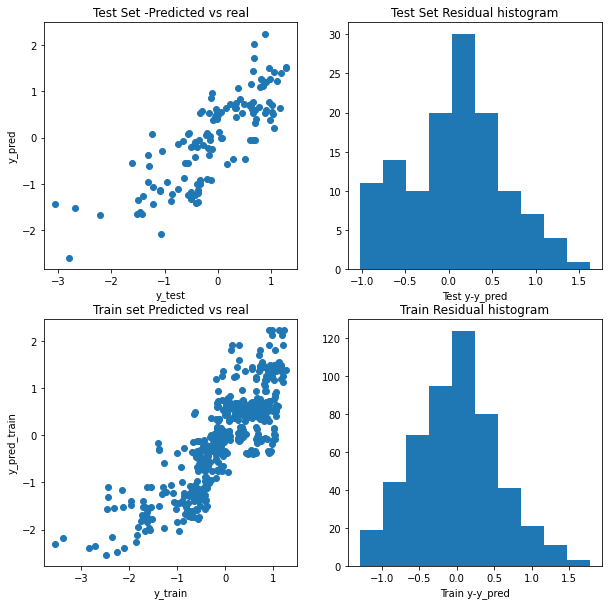

In [86]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [87]:
train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 0.3191565494155735 -- test MSE: 0.3310379601464638


In [88]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 0.5649394210139468 -- test RMSE: 0.5753589837192635


In [89]:
train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 0.3191565494155735 -- test MAE: 0.3310379601464638


In [90]:
r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

0.6367706579035273
0.6367706579035273


In [91]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.6089488359557123


In [92]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     183.6
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          6.26e-123
Time:                        16:33:11   Log-Likelihood:                -429.89
No. Observations:                 507   AIC:                             873.8
Df Residuals:                     500   BIC:                             903.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0162      0.02

SyntaxError: invalid syntax (2144445223.py, line 1)